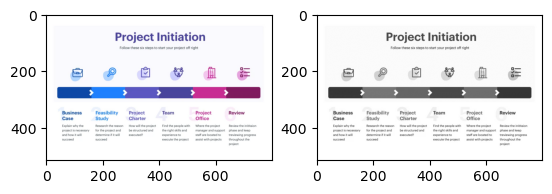

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
color_img = np.asarray(Image.open(rf"C:\Users\User\Desktop\project-initiation-steps.webp"))
gray_img = np.mean(color_img, axis=2).astype(np.uint8)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(color_img)
ax[1].imshow(gray_img, cmap='gray')

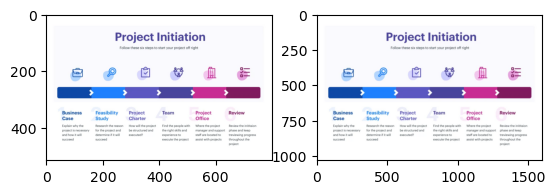

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(rf"C:\Users\User\Desktop\project-initiation-steps.webp")
img2 = cv2.resize(img, None, fx=2, fy=2)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

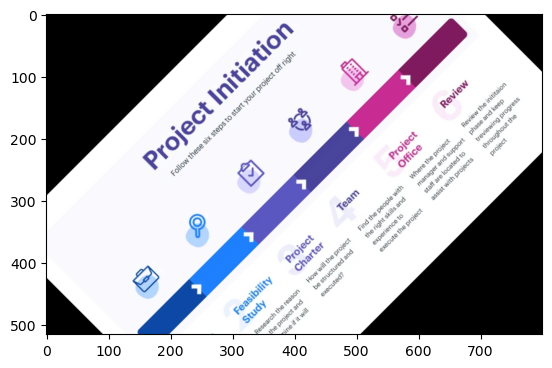

In [4]:
# cv2.warpAffine(img,M,dsize[,dst[flags[,borderMode[,borderValue]]]])

# cv2.getRotationMatrix2D(center, angle,scale)

img = cv2.imread(rf"C:\Users\User\Desktop\project-initiation-steps.webp")
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 45 # Rotate by 45 degrees
scale = 1.0 # No scaling
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
